In [1]:
%pip install pandas_ta


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_ta as ta

%matplotlib inline


In [13]:
apple = r'C:\Users\Dagi\Documents\KAIM\Week 1\Financial-News-Sentiment-Stock-Market-Correlation-Analysis\data\yfinance_data\AAPL_historical_data.csv'
amazon = r'C:\Users\Dagi\Documents\KAIM\Week 1\Financial-News-Sentiment-Stock-Market-Correlation-Analysis\data\yfinance_data\AMZN_historical_data.csv'
google = r'C:\Users\Dagi\Documents\KAIM\Week 1\Financial-News-Sentiment-Stock-Market-Correlation-Analysis\data\yfinance_data\GOOG_historical_data.csv'
meta = r'C:\Users\Dagi\Documents\KAIM\Week 1\Financial-News-Sentiment-Stock-Market-Correlation-Analysis\data\yfinance_data\META_historical_data.csv'
microsoft = r'C:\Users\Dagi\Documents\KAIM\Week 1\Financial-News-Sentiment-Stock-Market-Correlation-Analysis\data\yfinance_data\MSFT_historical_data.csv'
nividia = r'C:\Users\Dagi\Documents\KAIM\Week 1\Financial-News-Sentiment-Stock-Market-Correlation-Analysis\data\yfinance_data\NVDA_historical_data.csv'
tesla = r'C:\Users\Dagi\Documents\KAIM\Week 1\Financial-News-Sentiment-Stock-Market-Correlation-Analysis\data\yfinance_data\TSLA_historical_data.csv'


In [14]:
apple = pd.read_csv(apple)
amazon = pd.read_csv(amazon)
google = pd.read_csv(google)
meta = pd.read_csv(meta)
microsoft = pd.read_csv(microsoft)
nividia = pd.read_csv(nividia)
tesla = pd.read_csv(tesla)

In [17]:
amazon.shape, google.shape, meta.shape, microsoft.shape, nividia.shape, tesla.shape

((6846, 9), (5020, 9), (2926, 9), (9672, 9), (6421, 9), (3545, 9))

In [18]:
data = amazon
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0


In [19]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,6846.000000,6846.000000,6846.000000,6846.000000,6846.000000,6.846000e+03,6846.0,6846.000000
mean,37.360464,37.801009,36.882561,37.351096,37.351096,1.380713e+08,0.0,0.003944
std,53.756955,54.366449,53.087051,53.729913,53.729913,1.382346e+08,0.0,0.246789
min,0.070313,0.072396,0.065625,0.069792,0.069792,9.744000e+06,0.0,0.000000
25%,2.070125,2.120625,2.040156,2.076750,2.076750,6.505442e+07,0.0,0.000000
50%,8.574500,8.666750,8.466500,8.591500,8.591500,1.020650e+08,0.0,0.000000
75%,50.453876,50.723249,50.059875,50.426500,50.426500,1.567560e+08,0.0,0.000000
max,200.089996,201.199997,199.050003,200.000000,200.000000,2.086584e+09,0.0,20.000000


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6846 entries, 0 to 6845
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6846 non-null   object 
 1   Open          6846 non-null   float64
 2   High          6846 non-null   float64
 3   Low           6846 non-null   float64
 4   Close         6846 non-null   float64
 5   Adj Close     6846 non-null   float64
 6   Volume        6846 non-null   int64  
 7   Dividends     6846 non-null   float64
 8   Stock Splits  6846 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 481.5+ KB


In [21]:
data.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [22]:
data.duplicated().sum()

0

In [23]:
data.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Adj Close       float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

In [24]:
# Convert date column to datetime if necessary
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [25]:
data.corr()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Open,1.000000,0.999921,0.999904,0.999805,0.999805,-0.297579,NaN,0.016639
High,0.999921,1.000000,0.999885,0.999908,0.999908,-0.296579,NaN,0.017159
Low,0.999904,0.999885,1.000000,0.999914,0.999914,-0.298666,NaN,0.016668
Close,0.999805,0.999908,0.999914,1.000000,1.000000,-0.297628,NaN,0.016564
Adj Close,0.999805,0.999908,0.999914,1.000000,1.000000,-0.297628,NaN,0.016564
Volume,-0.297579,-0.296579,-0.298666,-0.297628,-0.297628,1.000000,NaN,0.016065
Dividends,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stock Splits,0.016639,0.017159,0.016668,0.016564,0.016564,0.016065,NaN,1.000000


In [ ]:
Technical Indicators

In [26]:
# Calculate Moving Averages
data['SMA_50'] = ta.sma(data['Close'], length=50)
data['SMA_200'] = ta.sma(data['Close'], length=200)

# Calculate RSI (Relative Strength Index)
data['RSI'] = ta.rsi(data['Close'], length=14)

# Calculate MACD (Moving Average Convergence Divergence)
macd = ta.macd(data['Close'], fast=12, slow=26, signal=9)
data['MACD'] = macd['MACD_12_26_9']
data['MACD_signal'] = macd['MACDs_12_26_9']
data['MACD_hist'] = macd['MACDh_12_26_9']

# Check the first few rows with new columns
data.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_50,SMA_200,RSI,MACD,MACD_signal,MACD_hist
Date,,,,,,,,,,,,,,
1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
len(data['MACD'].unique())

6814

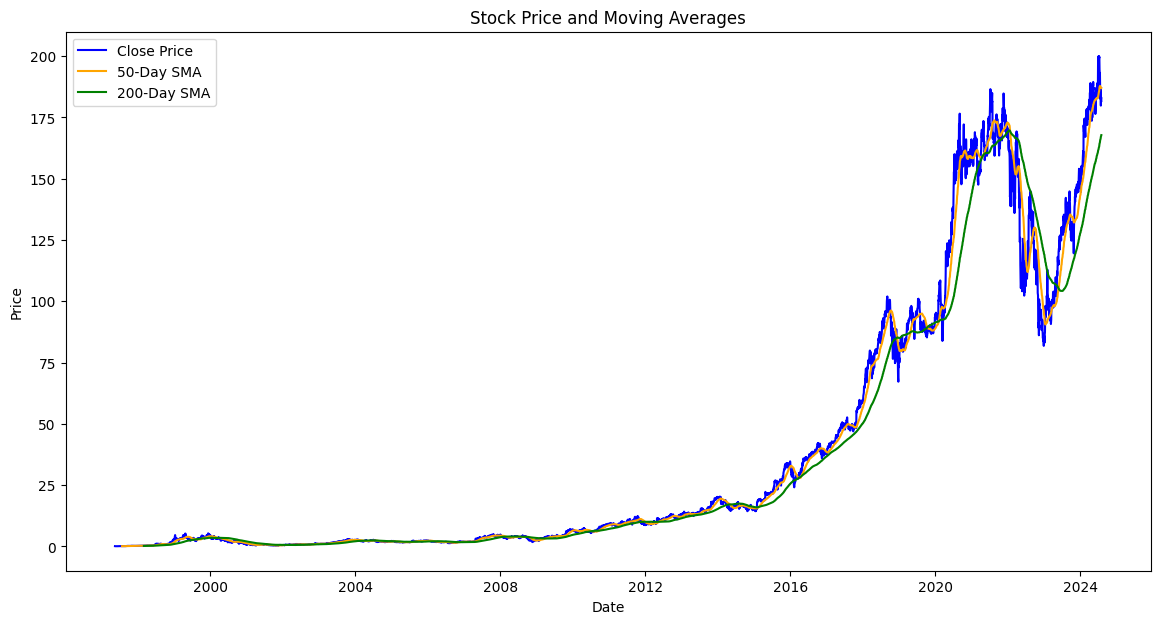

In [29]:
# Plot Closing Price and Moving Averages
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['SMA_50'], label='50-Day SMA', color='orange')
plt.plot(data['SMA_200'], label='200-Day SMA', color='green')
plt.title('Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show()

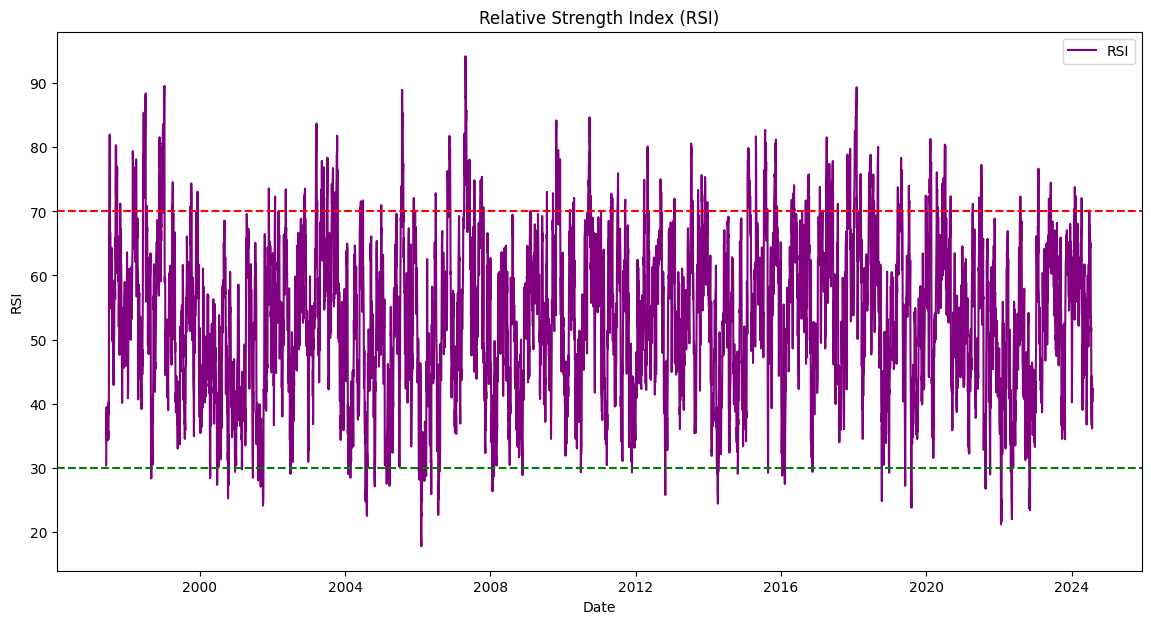

In [31]:
# Plot RSI
plt.figure(figsize=(14, 7))
plt.plot(data['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()

plt.show()

C:\Users\Dagi\AppData\Local\Temp\ipykernel_1796\2806792969.py:10: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('macd_signals.png')


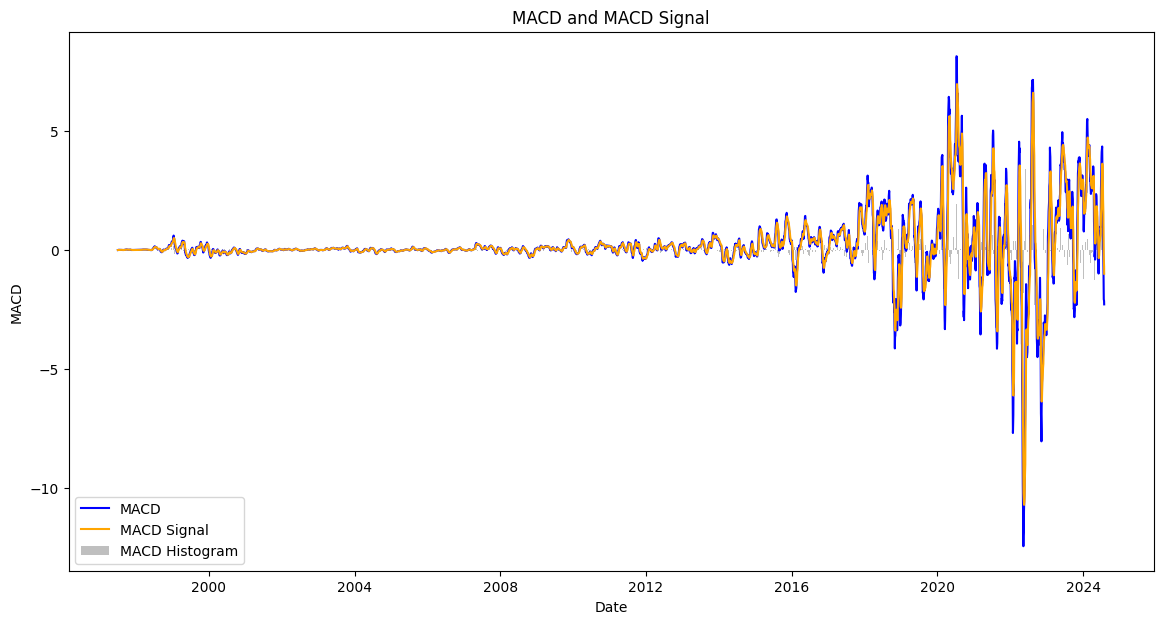

In [32]:
# Plot MACD
plt.figure(figsize=(14, 7))
plt.plot(data['MACD'], label='MACD', color='blue')
plt.plot(data['MACD_signal'], label='MACD Signal', color='orange')
plt.bar(data.index, data['MACD_hist'], label='MACD Histogram', color='grey', alpha=0.5)
plt.title('MACD and MACD Signal')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()

plt.show()

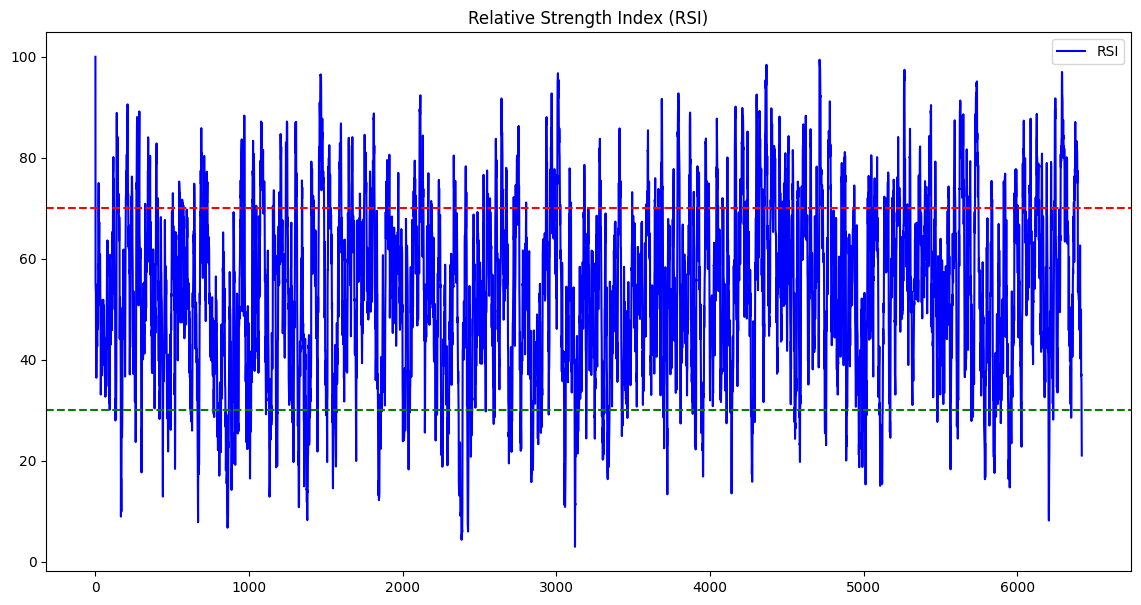

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv(r'C:\Users\Dagi\Documents\KAIM\Week 1\Financial-News-Sentiment-Stock-Market-Correlation-Analysis\data\yfinance_data\NVDA_historical_data.csv')

# Calculate RSI
def calculate_rsi(df, period=14):
    close = df['Close']
    delta = close.diff()

    gain = (delta.where(delta > 0, 0))
    loss = (-delta.where(delta < 0, 0))

    avg_gain = gain.rolling(window=period, min_periods=1).mean()
    avg_loss = loss.rolling(window=period, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    df['RSI'] = rsi
    return df

# Calculate MACD
def calculate_macd(df, short_period=12, long_period=26, signal_period=9):
    df['12_EMA'] = df['Close'].ewm(span=short_period, adjust=False).mean()
    df['26_EMA'] = df['Close'].ewm(span=long_period, adjust=False).mean()

    df['MACD'] = df['12_EMA'] - df['26_EMA']
    df['Signal_Line'] = df['MACD'].ewm(span=signal_period, adjust=False).mean()
    
    return df

# Apply RSI and MACD functions
df = calculate_rsi(df)
df = calculate_macd(df)

# Plot RSI
plt.figure(figsize=(14, 7))
plt.plot(df['RSI'], label='RSI', color='blue')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.show()

